In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import glob, os
from bs4 import BeautifulSoup

In [2]:
wiki_url  = 'https://en.wikipedia.org/wiki/Canada'
html_file_path = 'wiki_page.html'

try:
    response = requests.get(wiki_url)
    response.raise_for_status()  # Check for any errors in the HTTP response

    # Save the HTML content to a file
    with open(html_file_path, 'w', encoding='utf-8') as file:
        file.write(response.text)

    print("Page saved as wiki_page.html")

except requests.exceptions.RequestException as e:
    print(f"Error: {e}")

Page saved as wiki_page.html


In [3]:
# Read HTML file as text
with open(html_file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()
soup = BeautifulSoup(html_content, 'html.parser')
text_content = soup.get_text(separator=' ')

In [4]:
stopwords = set(STOPWORDS)
stopwords.add("Archived")
stopwords.add("ISBN")
stopwords.add("PDF")

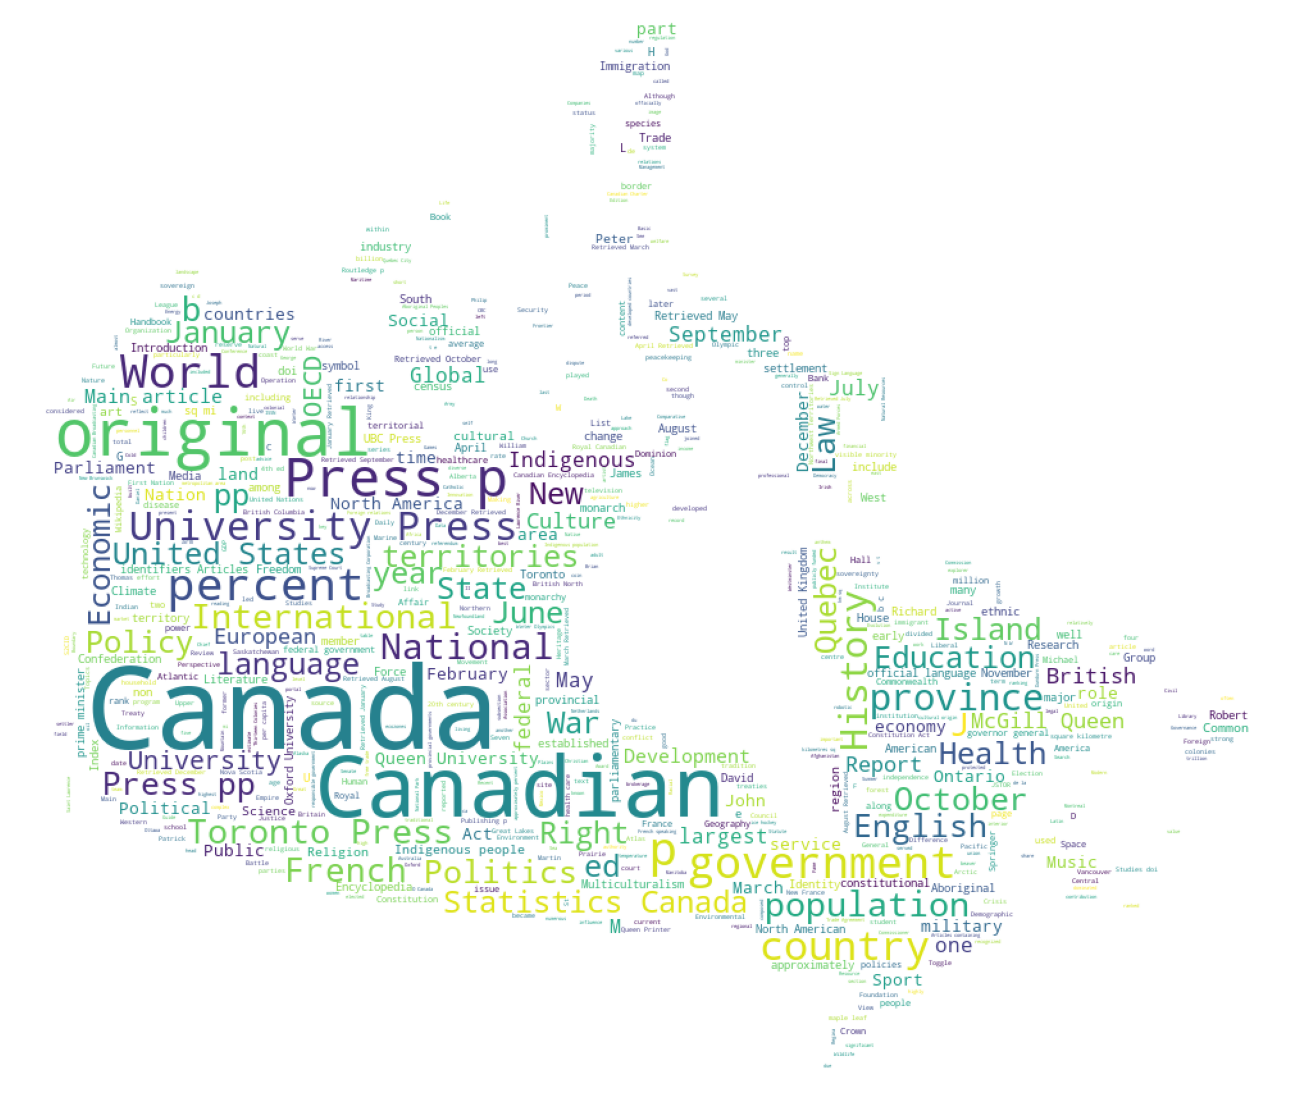

In [5]:
mask = np.array(Image.open("canada4.png"))

wc = WordCloud(width=1100, height=800,background_color="white",max_font_size=90,max_words=150000,random_state=2,stopwords=stopwords,mask=mask).generate(text_content)

# generate word cloud
wc.generate(text_content)

plt.figure(figsize=(18, 14))
plt.imshow(wc)
plt.axis("off")
plt.savefig('graph5.png',transparent=True, pad_inches=0.5,dpi=400, format="png")

# Display the figure
plt.show()